In [1]:
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(harmony))
suppressMessages(library(dplyr))
suppressMessages(library(cowplot))
suppressMessages(library(harmony))
suppressMessages(library(Nebulosa))

In [2]:
set.seed(42)
getwd()

[1] "/data/scATA/SingleCellOpenChromatin/local/VisiumHeartRevision/IntegrativeAnalysis/Endothelial/code"

In [3]:
coembed <- readRDS("../data/coembed/coembed.Rds")
coembed

An object of class Seurat 
135323 features across 38492 samples within 3 assays 
Active assay: RNA (28933 features, 2000 variable features)
 2 other assays present: peaks, GeneActivity
 4 dimensional reductions calculated: pca, umap, harmony, umap_harmony

In [4]:
coembed@meta.data$`RNA_snn_res.0.2` <- NULL
coembed@meta.data$`RNA_snn_res.0.3` <- NULL
coembed@meta.data$`RNA_snn_res.0.4` <- NULL
coembed@meta.data$`RNA_snn_res.0.5` <- NULL
coembed@meta.data$`RNA_snn_res.0.6` <- NULL
coembed@meta.data$`RNA_snn_res.0.7` <- NULL
coembed@meta.data$`RNA_snn_res.0.8` <- NULL
coembed@meta.data$`RNA_snn_res.0.9` <- NULL
coembed@meta.data$`RNA_snn_res.1` <- NULL

In [5]:
colnames(coembed@meta.data)

[1] "orig.ident"            "nCount_peaks"          "nFeature_peaks"       
 [4] "Sample"                "Clusters"              "region"               
 [7] "patient"               "patient_region_id"     "patient_group"        
[10] "nCount_GeneActivity"   "nFeature_GeneActivity" "tech"                 
[13] "nCount_RNA"            "nFeature_RNA"          "percent.mt"           
[16] "doublet_score"         "doublet"               "dissociation_s1"      
[19] "opt_clust"             "batch"                 "opt_clust_integrated" 
[22] "cell_type"             "seurat_clusters"       "opt_state"

Harmony 1/30

Harmony 2/30

Harmony 3/30

Harmony 4/30

Harmony 5/30

Harmony 6/30

Harmony 7/30

Harmony 8/30

Harmony 9/30

Harmony 10/30

Harmony 11/30

Harmony 12/30

Harmony 13/30

Harmony converged after 13 iterations

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


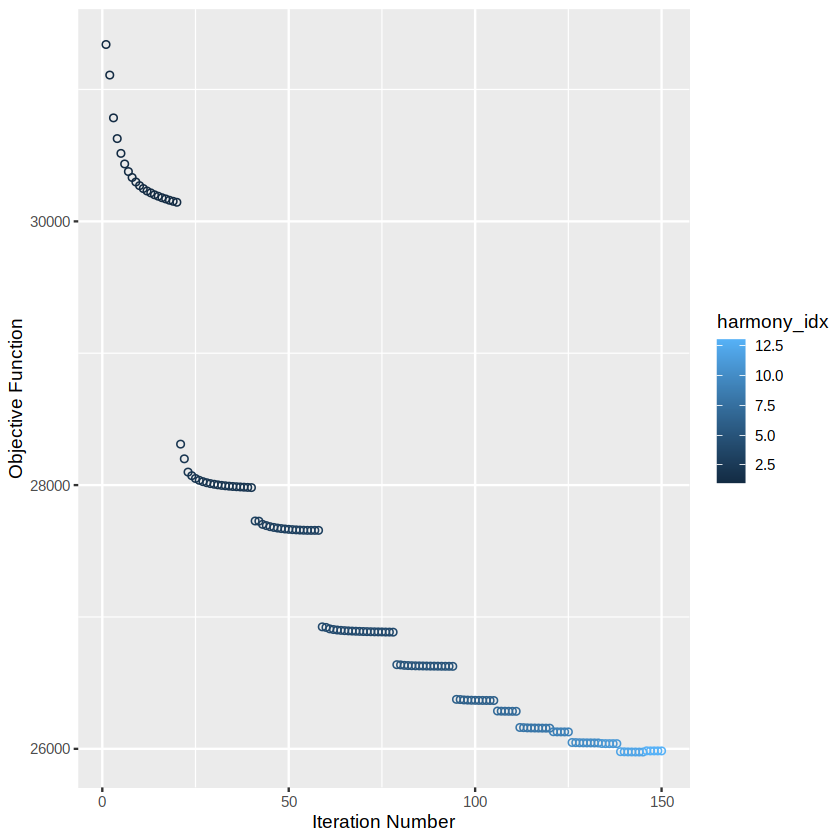

In [6]:
coembed <- RunHarmony(coembed, 
                      group.by.vars = c("patient", "region", "tech"),
                     reduction = "pca", 
                      max.iter.harmony = 30, 
                      dims.use = 1:30,
                     project.dim = FALSE,
                     plot_convergence = TRUE)

coembed <- RunUMAP(coembed, 
               dims = 1:30, 
               reduction = 'harmony',
               reduction.name = "umap_harmony",
               reduction.ke = 'umapharmony_',
              verbose = FALSE,
                   min.dist = 0.4)

In [7]:
# optimize resolution for clustering
# https://gist.github.com/BenjaminDoran/a4c8939b2f180b5ddf7e9179697d07ba
######## calculate the FindClusters over a large range of resolutions
coembed <- FindNeighbors(coembed, reduction = "harmony", dims = 1:30)

print("Performing parameter scan over multiple resolutions...")
set.res <- seq(0.1, 1, 0.1)
coembed <- FindClusters(object = coembed, resolution = set.res,
                    random.seed = 42)

Computing nearest neighbor graph

Computing SNN



[1] "Performing parameter scan over multiple resolutions..."
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 38492
Number of edges: 2365667

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9398
Number of communities: 18
Elapsed time: 10 seconds


14 singletons identified. 4 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 38492
Number of edges: 2365667

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9171
Number of communities: 20
Elapsed time: 10 seconds


14 singletons identified. 6 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 38492
Number of edges: 2365667

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8981
Number of communities: 20
Elapsed time: 11 seconds


14 singletons identified. 6 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 38492
Number of edges: 2365667

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8808
Number of communities: 21
Elapsed time: 11 seconds


14 singletons identified. 7 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 38492
Number of edges: 2365667

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8656
Number of communities: 22
Elapsed time: 10 seconds


14 singletons identified. 8 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 38492
Number of edges: 2365667

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8525
Number of communities: 25
Elapsed time: 10 seconds


14 singletons identified. 11 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 38492
Number of edges: 2365667

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8406
Number of communities: 26
Elapsed time: 12 seconds


14 singletons identified. 12 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 38492
Number of edges: 2365667

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8300
Number of communities: 25
Elapsed time: 10 seconds


14 singletons identified. 11 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 38492
Number of edges: 2365667

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8207
Number of communities: 27
Elapsed time: 10 seconds


14 singletons identified. 13 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 38492
Number of edges: 2365667

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8130
Number of communities: 30
Elapsed time: 10 seconds


14 singletons identified. 16 final clusters.



Loading required package: ggraph

Warning message:
“The `add` argument of `group_by()` is deprecated as of dplyr 1.0.0.
Please use the `.add` argument instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


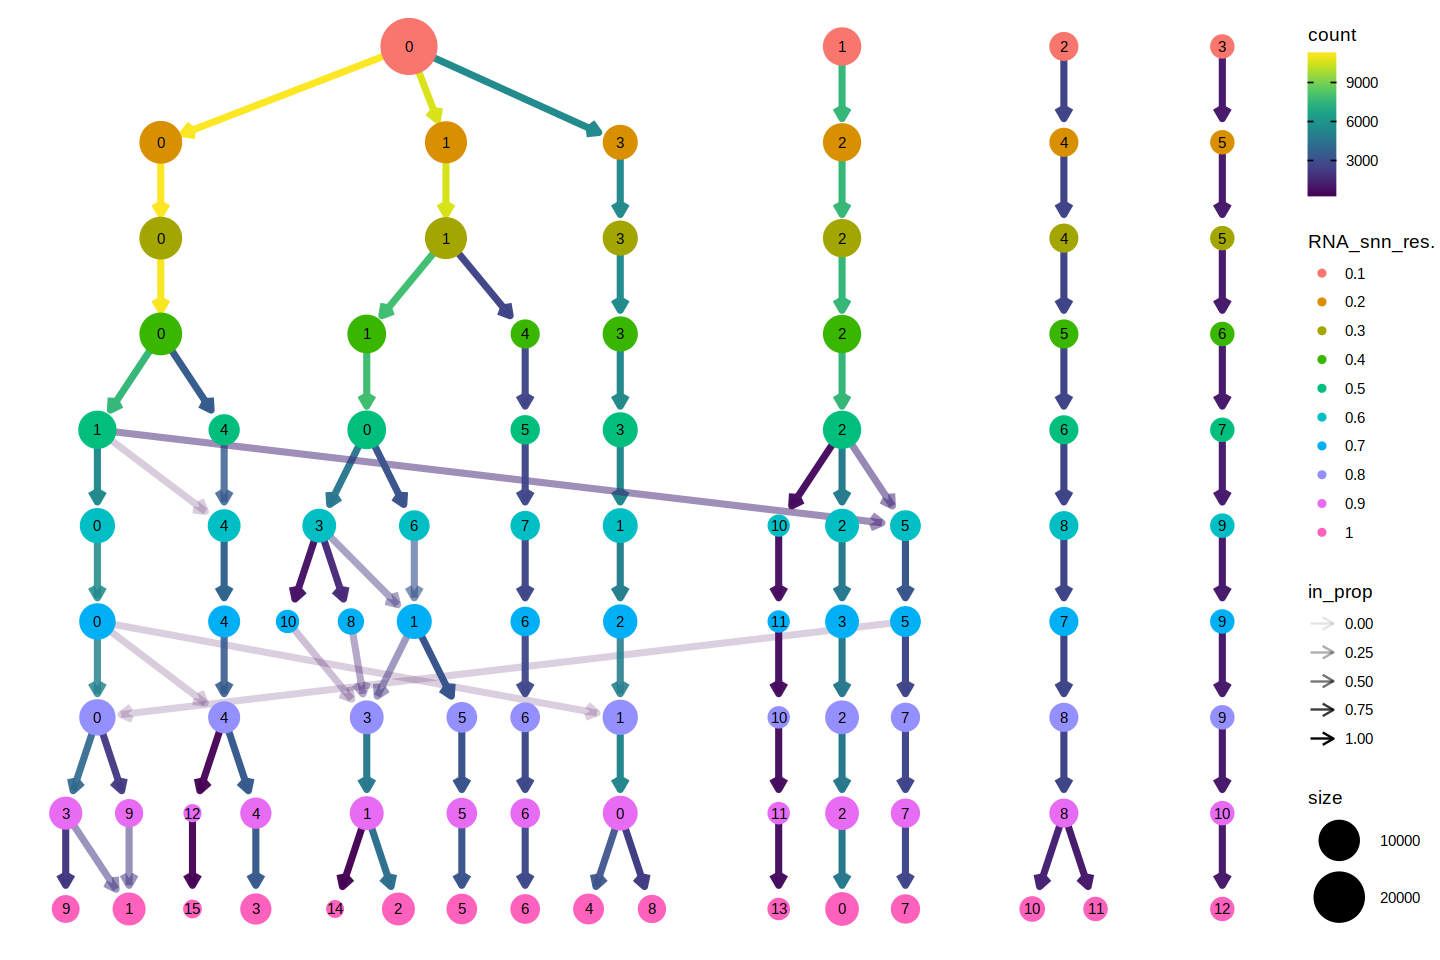

In [8]:
library(clustree)

options(repr.plot.height = 8, repr.plot.width = 12)

clustree(coembed, prefix = "RNA_snn_res.")

In [9]:
print("Computing a silhouette width for each cell, for each resolution...")
require(cluster)

dist <- dist(coembed@reductions$harmony@cell.embeddings,
             method = "euclidean",
             upper = TRUE)

[1] "Computing a silhouette width for each cell, for each resolution..."


Loading required package: cluster



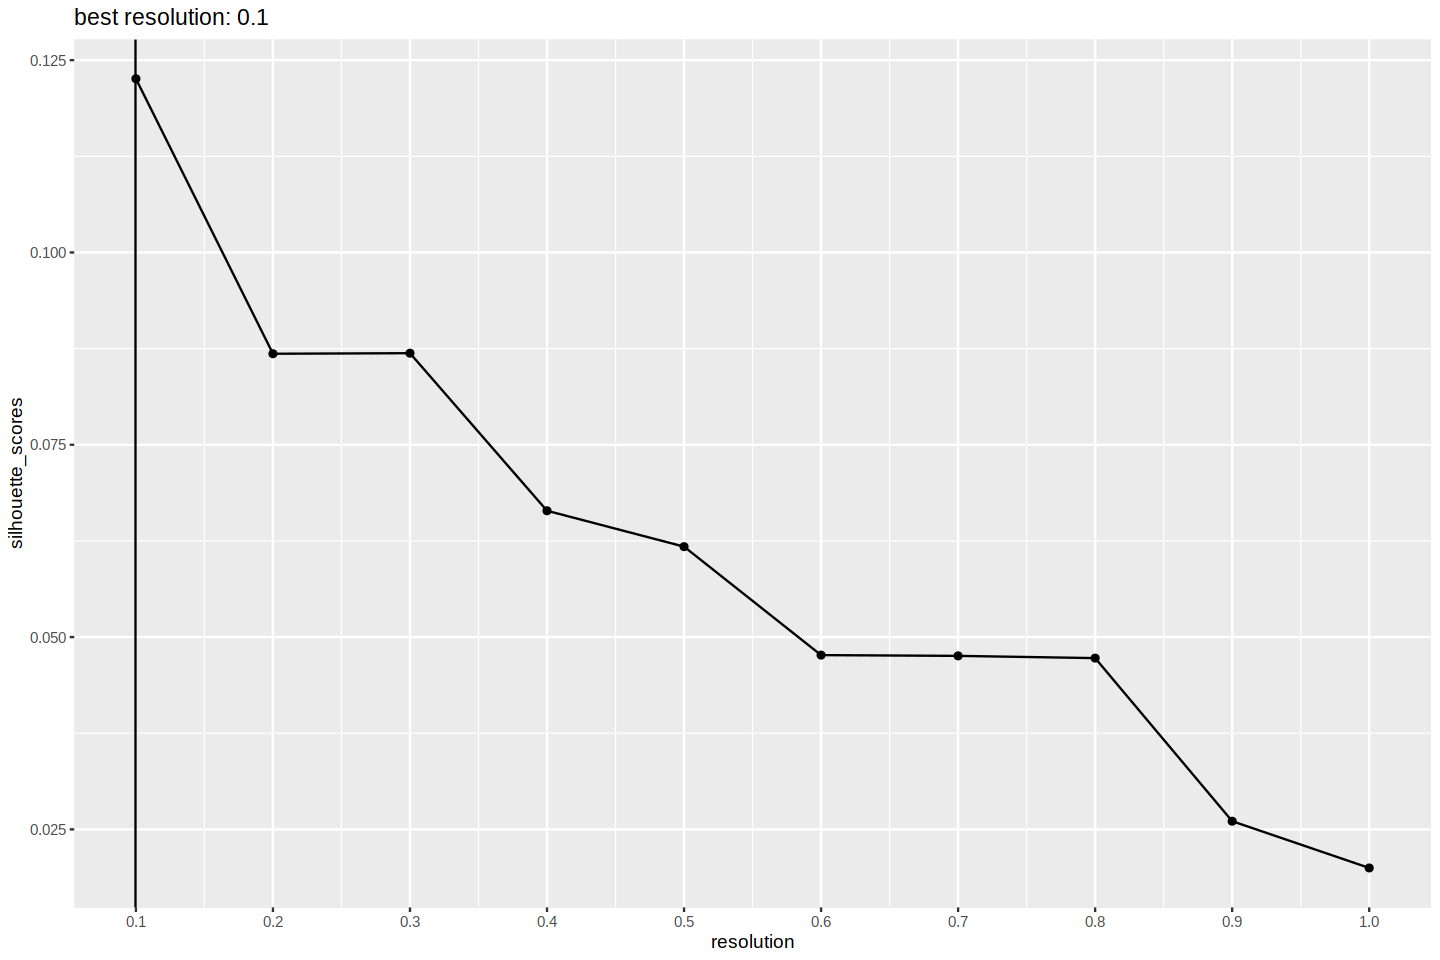

In [12]:
silhouette_scores <- lapply(set.res, function(x){
    clusters <- coembed@meta.data[, paste("RNA_snn_res.", x, sep="")]
    #si <- silhouette(as.numeric(as.vector(clusters)), dist)
    si <- silhouette(as.numeric(clusters), dist)
    mean(si[, 'sil_width'])
})

opt_res <- set.res[which.max(silhouette_scores)]

df.plot <- data.frame(resolution = set.res,
                      silhouette_scores = unlist(silhouette_scores))

p <- ggplot(data = df.plot, aes(x = resolution,
                                y = silhouette_scores)) +
    geom_vline(xintercept = opt_res) +
    geom_point() +
    geom_line() +
    scale_x_continuous(breaks = set.res) +
    ggtitle(label = sprintf("best resolution: %s", opt_res))

print(p)

write.csv(df.plot, "../data/coembed/silhouette_score.csv")

In [11]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Rocky Linux 8.5 (Green Obsidian)

Matrix products: default
BLAS/LAPACK: /home/rs619065/miniconda3/envs/r-4.1/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] cluster_2.1.2               clustree_0.4.4             
 [3] ggraph_2.0.5                Nebulosa_1.4.0             
 [5] patchwork_1.1.1             cowplot_1.1.1              
 [7] dplyr_1.0.8                 harmony_0.1.0              
 [9] Rcpp_1.0.8                